## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from extract_center import CenterExtracter

import os, glob
import imageio.v2 as imageio

## Loading the Image

In [9]:
plt.rcdefaults()

In [10]:
c = CenterExtracter(region=(820, 390, 920, 490))

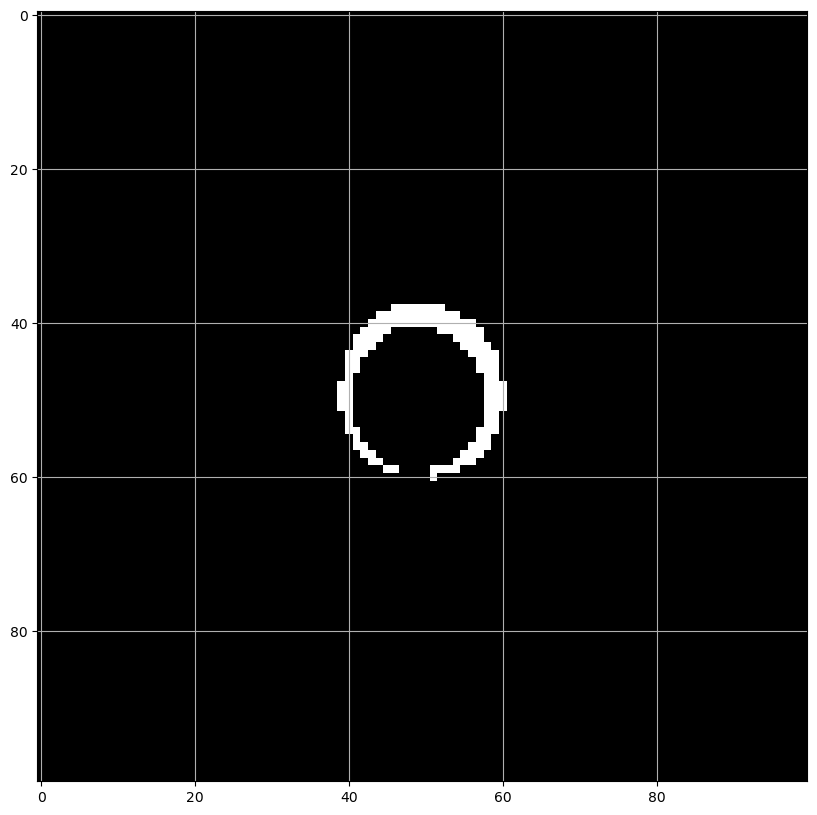

In [11]:
img = c._read_image_("34.jpg")
img = c._subtract_image_(img)
img = c._crop_(img, *(0,0,200,200))
img =  c._threshold_()
c._show_image_(img)

## Creating Functions

### Loop Through Rows

False

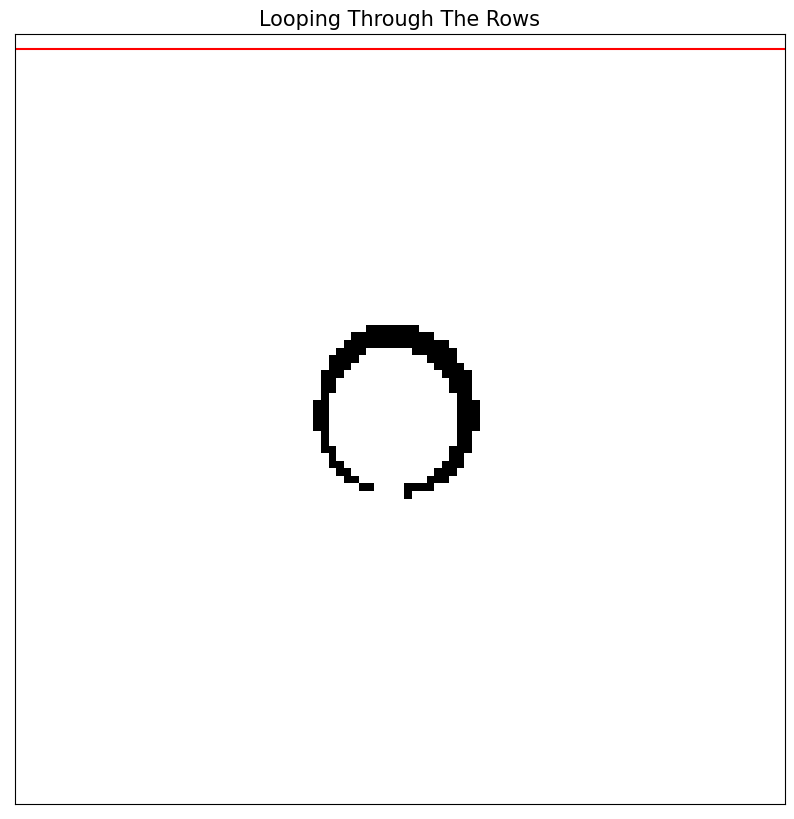

In [12]:
def plot_image_with_h_line(h, dir="temp", save=True, partial=False, prefix="h_"):
    maxima = False
    os.mkdir(dir) if not os.path.exists(dir) else None
    plt.figure(figsize=(10,10))
    plt.title("Looping Through The Rows", fontdict={'fontsize': '15'})
    plt.imshow(-img, cmap='gray');
    plt.xlim(-1, img.shape[1]+1)
    plt.ylim(img.shape[0]+1, -1)
    plt.xticks([])
    plt.yticks([])

    # plt.grid(True)
    max_position = img[h, :].argmax()
    # print(max_position)
    if max_position:
        maxima = True
    if h>37:
        plt.axhline(37, color='g', lw=2)
        plt.scatter(46, 37, color='r', s=100)
        plt.annotate(f"{46+c.X,37+c.Y}", (46, 37-3), color='g', fontsize=13, fontweight='bold')
    if h>60:
        plt.axhline(60, color='g', lw=2)
        plt.scatter(51, 60, color='r', s=100)
        plt.annotate(f"{51+c.X,60+c.Y}", (51, 60-3), color='g', fontsize=13, fontweight='bold')

    if max_position and not partial:
        plt.axhline(h, color='g', lw=2)
        plt.scatter(max_position, h, color='r', s=100)
        plt.annotate(f"{max_position+c.X,h+c.Y}", (max_position, h-3), color='g', fontsize=13, fontweight='bold')
    else:
        plt.axhline(h,color='r')
    if save:
        if len(str(h)) ==1:
            h = "00"+str(h)
        elif len(str(h)) ==2:
            h = "0"+str(h)
        else:
            h = str(h)
        plt.savefig(f"{dir}\{prefix}{h}.png")
    return maxima
plot_image_with_h_line(1, partial=True)

### Loop Through Columns

False

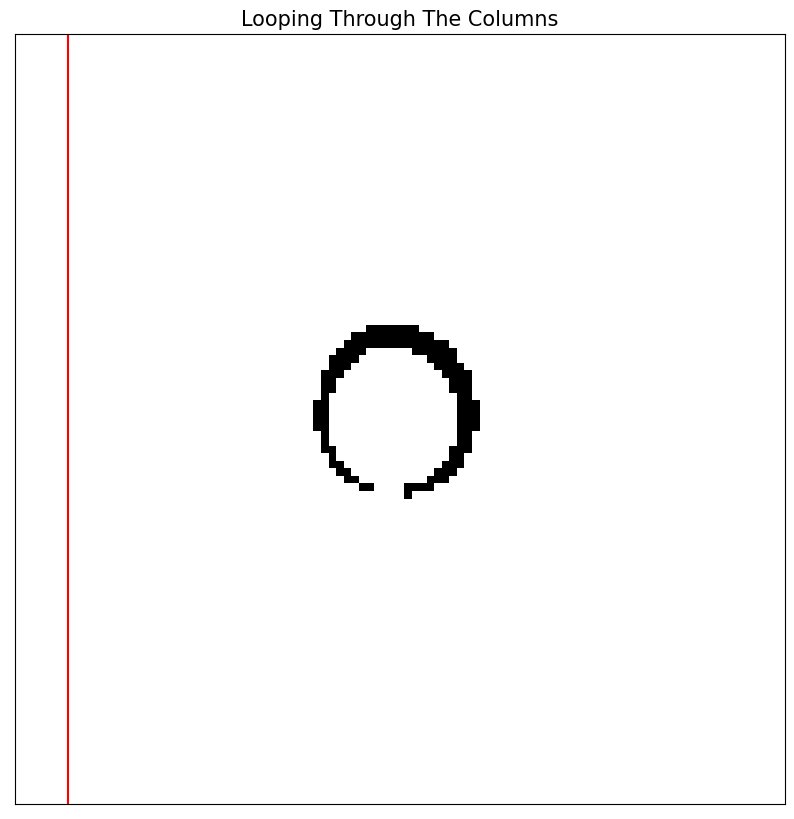

In [13]:
def plot_image_with_v_line(h, dir="temp", save=True, partial=False, prefix="v_", done_row=True):
    maxima = False
    os.mkdir(dir) if not os.path.exists(dir) else None
    plt.figure(figsize=(10,10))
    plt.title("Looping Through The Columns", fontdict={'fontsize': '15'})
    plt.imshow(-img, cmap='gray');
    plt.xlim(-1, img.shape[1]+1)
    plt.ylim(img.shape[0]+1, -1)
    plt.xticks([])
    plt.yticks([])

    # plt.grid(True)
    max_position = img[:, h].argmax()
    # print(max_position)
    if max_position:
        maxima = True
    if done_row:
        plt.axhline(37, color='g', lw=2)
        plt.scatter(46, 37, color='r', s=100)
        plt.annotate(f"{46+c.X,37+c.Y}", (46, 37-3), color='g', fontsize=13, fontweight='bold')
        plt.axhline(60, color='g', lw=2)
        plt.scatter(51, 60, color='r', s=100)
        plt.annotate(f"{51+c.X,60+c.Y}", (51, 60-3), color='g', fontsize=13, fontweight='bold')
    if h>39:
        plt.axvline(39, color='b', lw=2)
        plt.scatter(39, 48, color='r', s=100)
        plt.annotate(f"{39+c.X,48+c.Y}", (39, 48-3), color='b', fontsize=13, fontweight='bold')

    if h>60:
        plt.axvline(60, color='b', lw=2)
        plt.scatter(60, 48, color='r', s=100)
        plt.annotate(f"{60+c.X,48+c.Y}", (60, 48-3), color='b', fontsize=13, fontweight='bold')
    if max_position and not partial:
        plt.axvline(h, color='b', lw=2)
        plt.scatter(h, max_position, color='r', s=100)
        plt.annotate(f"{h+c.Y, max_position+c.X}", (h+3, max_position), color='b', fontsize=13, fontweight='bold')
    else:
        plt.axvline(h,color='r')
    if save:
        if len(str(h)) ==1:
            h = "00"+str(h)
        elif len(str(h)) ==2:
            h = "0"+str(h)
        else:
            h = str(h)
        plt.savefig(f"{dir}\{prefix}{h}.png")
    return maxima
plot_image_with_v_line(6, done_row=False)

### Plotting Final Stage of the Animation

#### Plotting Lines

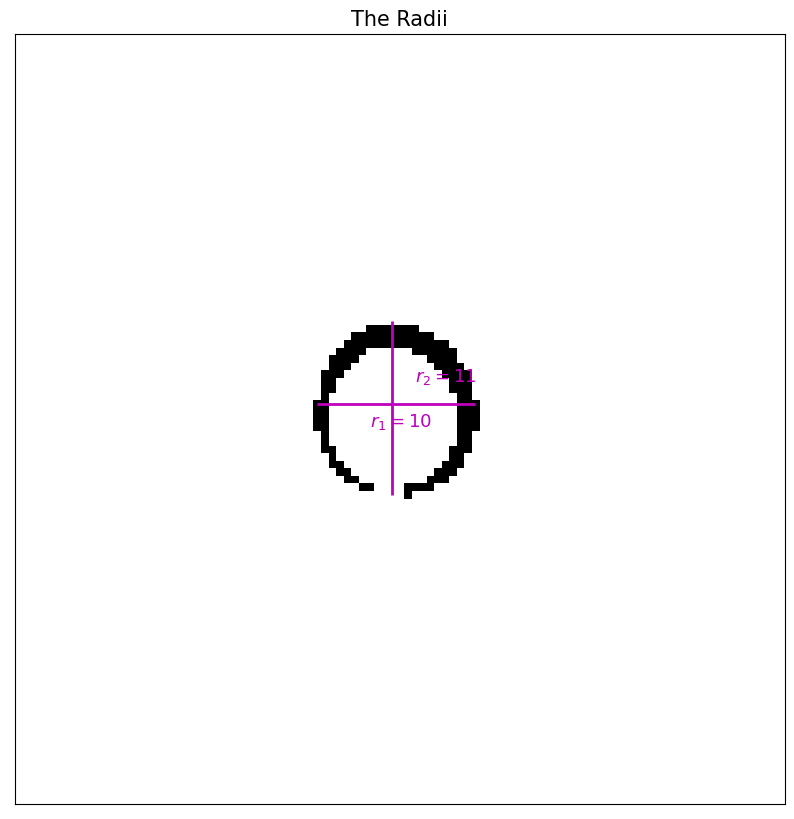

In [14]:
def plot_lines(file_name = "", with_radii=False):
    plt.figure(figsize=(10,10))
    plt.title("The Lines", fontdict={'fontsize': '15'})
    plt.imshow(-img, cmap='gray');
    plt.xlim(-1, img.shape[1]+1)
    plt.ylim(img.shape[0]+1, -1)
    plt.xticks([])
    plt.yticks([])
    if not with_radii:
        plt.axhline(37, color='g', lw=2)
        plt.annotate(f"{37+c.Y}", (50, 37-2), color='g', fontsize=13, fontweight='bold')

        plt.axhline(60, color='g', lw=2)
        plt.annotate(f"{60+c.Y}", (50, 60+3), color='g', fontsize=13, fontweight='bold')

        plt.axvline(39, color='b', lw=2)
        plt.annotate(f"{39+c.X}", (39-6, 50), color='b', fontsize=13, fontweight='bold')

        plt.axvline(60, color='b', lw=2)
        plt.annotate(f"{60+c.X}", (60+2, 50), color='b', fontsize=13, fontweight='bold')

    if with_radii:
        cx = (39+60)//2
        cy = (37+60)//2
        r1 = (60-39)//2
        r2 = (60-37)//2
        plt.hlines(cy, 39, 60, color='m', lw=2)
        plt.annotate(f"$r_1 = {r1}$", (cx-3, cy+3), color='m', fontsize=13, fontweight='bold')
        plt.vlines(cx, 37, 60, color='m', lw=2)
        plt.annotate(f"$r_2 = {r2}$", (cx+3, cy-3), color='m', fontsize=13, fontweight='bold')
        plt.title("The Radii", fontdict={'fontsize': '15'})
    if file_name:
        plt.savefig(f"{file_name}")
plot_lines(with_radii=True)
    

#### Plotting Center and Radii

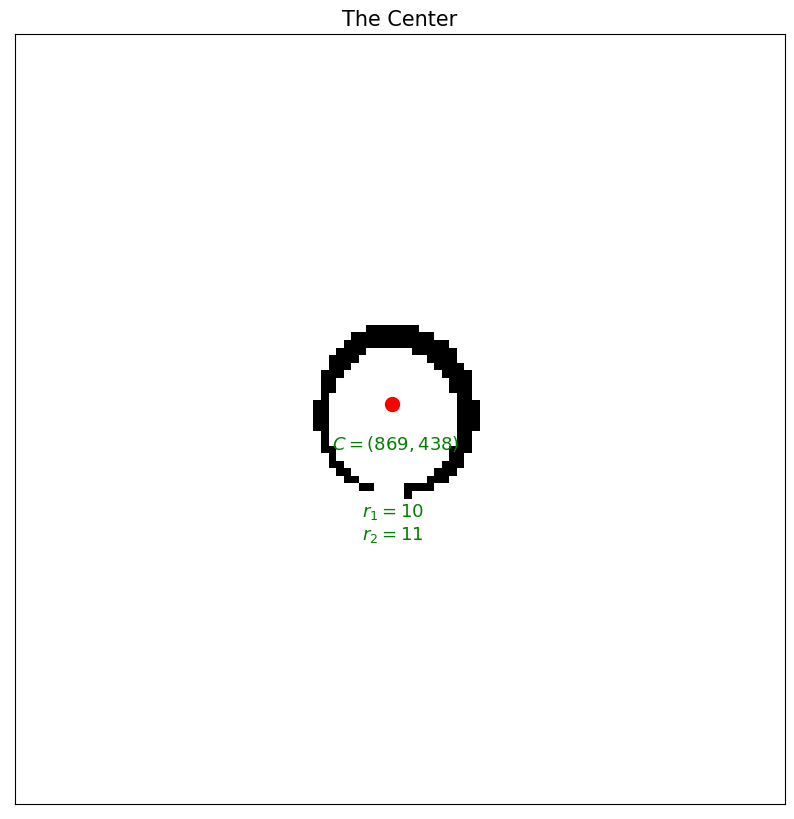

In [16]:
def plot_center_lines(center = False, file_name = ""):
    plt.figure(figsize=(10,10))
    plt.title("The Center", fontdict={'fontsize': '15'})
    plt.imshow(-img, cmap='gray');
    plt.xlim(-1, img.shape[1]+1)
    plt.ylim(img.shape[0]+1, -1)
    plt.xticks([])
    plt.yticks([])
    cx = (39+60)//2
    cy = (37+60)//2
    r1 = (60-39)//2
    r2 = (60-37)//2
    if center:
        col = "g"
    else:
        col = "k"
    if not center:
        plt.axhline(cy, color='g', lw=2)
        plt.axvline(cx, color='b', lw=2)
        plt.annotate(f"$r_1 = {r1}$", (cx-3, cy+3), color='m', fontsize=13, fontweight='bold')
        # plt.vlines(cx, 37, 60, color='m', lw=2)
        plt.annotate(f"$r_2 = {r2}$", (cx+3, cy-3), color='m', fontsize=13, fontweight='bold')
    else:
        plt.annotate(f"$r_1 = {r1}$", (cx-4, cy+15), color=col, fontsize=13, fontweight='bold')
        plt.annotate(f"$r_2 = {r2}$", (cx-4, cy+18), color=col, fontsize=13, fontweight='bold')
    plt.scatter(cx, cy, color='r', s=100)
    plt.annotate(f"$C = ({cx+c.X}, {cy+c.Y})$", (cx-8, cy+6), color=col, fontsize=13, fontweight='bold')
    
    if file_name:
        plt.savefig(f"{file_name}")
plot_center_lines(center=True)
    

### Function to Make Video

In [17]:
def make_video(dir="temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}\*.png")
    for file in files:
        images.append(imageio.imread(file))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}\{name}", images)
    else:
        imageio.mimsave(f"{dir}\{name}", images, duration=0.1)
    if delete:
        for file in files:
            os.remove(file)

## Creating the Animations

### Rows

In [10]:
%%capture
maxima = False
for h in range(img.shape[0]): 
    if maxima:
        maxima = plot_image_with_h_line(h, dir="row", partial=True)
        if not maxima:
            plot_image_with_h_line(h-1, dir="row", partial=False)
            continue
    else:
        maxima = plot_image_with_h_line(h, dir="row")


In [11]:
make_video(dir="row", name="looping_through_rows.gif")
make_video(dir="row", name="looping_through_rows.mp4", delete=True)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


### Columns

In [12]:
%%capture
maxima = False
for h in range(img.shape[1]): 
    if maxima:
        maxima = plot_image_with_v_line(h, dir="col", done_row=False, partial=True)
        if not maxima:
            plot_image_with_v_line(h-1, dir="col", done_row=False, partial=False)
            continue
    else:
        maxima = plot_image_with_v_line(h, dir="col",done_row=False)

In [13]:
make_video(dir="col", name="looping_through_cols.gif")
make_video(dir="col", name="looping_through_cols.mp4", delete=True)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


### Final Animation

In [18]:
%%capture
dir = "all"
#Row
maxima = False
for h in range(img.shape[0]): 
    if maxima:
        maxima = plot_image_with_h_line(h, dir=dir, prefix="a_", partial=True)
        if not maxima:
            plot_image_with_h_line(h-1, dir=dir, prefix="a_", partial=False)
            continue
    else:
        maxima = plot_image_with_h_line(h, dir=dir, prefix="a_")

#Col
maxima = False
for h in range(img.shape[1]): 
    if maxima:
        maxima = plot_image_with_v_line(h, dir=dir, prefix="b_", partial=True)
        if not maxima:
            plot_image_with_v_line(h-1, dir=dir, prefix="b_", partial=False)
            continue
    else:
        maxima = plot_image_with_v_line(h, dir=dir, prefix="b_")

#Just the lines
for i in range(15):
    file_path = f"{dir}\c_{i}.png"
    plot_lines(file_path)

#Lines with radii
for i in range(15):
    file_path = f"{dir}\d_{i}.png"
    plot_lines(file_path,with_radii=True)

#Center lines
for i in range(15):
    file_path = f"{dir}\e_{i}.png"
    plot_center_lines(file_name = file_path)

#Final image
for i in range(15):
    file_path = f"{dir}\g_{i}.png"
    plot_center_lines(file_name = file_path, center=True)

In [19]:
make_video(dir="all", name="final.gif")
make_video(dir="all", name="final.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
